### Let's learn to take pictures by clicking a button on Jupyter Notebook
1. We start by importing the necessary Python libraries. 
  - To import the libraries, click on the cell below (You can tell if the cell is slected if you see a Green outline surrounding the cell), and 
  - Hit Shift + Enter on your keyboard or Click on the Run button from the Dashboard above 


In [1]:
# Import necessary Python libraries 
# OpenCV library
import cv2
# Python Imaging Library useed to load images from files, and to create new images
import PIL.Image
# BytesIO implements read and write bytes data in memory
from io import BytesIO
# Library to display stuff and clear stuff on Jupyer Notebook 
import IPython.display
from IPython.display import clear_output
# Library that makes calls to openCV a bit more convinient 
import imutils
# Useful library for array manipulation 
import numpy as np
# Time library for delay 
import time
# Library to integrate buttons and user inputs
from ipywidgets import widgets
# Import library for threading 
import datetime, threading

2. Lets declare the necessary variables 

In [2]:
# Declare variables
next_call = time.time()

3. Set the flag to 0 at the start 

In [3]:
# Set flag to 0
f = open("flag.txt", "w")
f.write("0")
f.close()

4. Lets create a function that converts array data to image 

In [4]:
#Function that converts array data to image
def array_to_image(a, fmt='jpeg'):
    # Create binary stream object
    f = BytesIO()
    
    # Convert array to binary stream object
    PIL.Image.fromarray(a).save(f, fmt)
    
    return IPython.display.Image(data=f.getvalue())

5. Lets create a function to read the frame from camera
  - We can use the cv2.flip() function to change the orientation of the image feed

In [5]:
# Function to read the frame form camera
def get_frame(cam):
    # Capture frame-by-frame
    ret, frame = cam.read()
    #flip image for natural viewing
    #frame = cv2.flip(frame, 1)

    return frame

6. Lets create a timer callback that calls itself every 1 second

In [6]:
# Timer callback to check if the flag is high or not 
def callFunction():
    global next_call
    #print(datetime.datetime.now())
    next_call = next_call + 1
    # Open the file to see if the flag is set high 
    f = open("flag.txt", "r")
    flag=f.read()
    f.close()
    # Save the file to disk, if the flag is high
    # open and set the flag to 0 again:
    if flag=='1':
        frame = get_frame(cam)
        # Save the file according to time stamp
        rightNow=datetime.datetime.now()
        filename=str(rightNow.year)+"_"+str(rightNow.month)+"_"+str(rightNow.day)+"_"+str(rightNow.hour)+"_"+str(rightNow.minute)+"_"+str(rightNow.second)
        cv2.imwrite("/home/pi/Desktop/me35Notebook/images/"+filename+".png", frame)
        print("Captured "+ filename)
        # Make a copy of the file so that users can access the latest captured image
        cv2.imwrite("/home/pi/Desktop/me35Notebook/images/image.png", frame)
        flag=0
        f = open("flag.txt", "w")
        f.write("0")
        f.close()
    f = open("flag.txt", "r")
    #print(f.read())
    f.close()
        
    threading.Timer(next_call-time.time(), callFunction).start()

7. Lets create function that updates the flag to 1 when you click the button

In [7]:
# Function to handle button click
def on_button_clicked(b):
    f = open("flag.txt", "w")
    f.write("1")
    f.close()
    f = open("flag.txt", "r")
    print(f.read())
    f.close()

8. Lets start the camera capture 

In [8]:
# Start video capture 
cam = cv2.VideoCapture(0)

9. Lets display the button. 
  - The button won't work right away because we have not started the streaming function yet. 

In [9]:
# Display the button
button = widgets.Button(description="Capture Image!")
display(button)

# Call on_button_clicked function to print the message
button.on_click(on_button_clicked)

Button(description='Capture Image!', style=ButtonStyle())

1
Captured 2020_2_13_10_5_3


9. Now let's set aside a space for the loaded image to be displayed

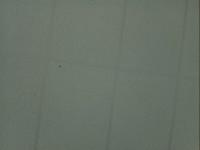

In [10]:
# Display the image
d1 = IPython.display.display("Your streaming will be displayed here", display_id=1)

10. Lets capture an image, change the color to RGB and resize it
  - Note: Be sure to release the camera after you're done

In [11]:
# Create a main loop 
def main_loop():
    # Grab the frame 
    frame = get_frame(cam)
    # Change the color to RGB
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Resize the image to 200px
    frame = imutils.resize(frame, width=200, inter=cv2.INTER_LINEAR)
    #Call the function to convert array data to image
    frame = array_to_image(frame)
    d1.update(frame)
    main_loop()

# Release the camera resource
#cam.release()

11. Lets start the main loop and the timer call back.
  - Scroll up to see the live feed from camera
  - Click on the button to capture an image 
  - The picture will be stored in Desktop/me35Notebook/images folder 

In [12]:
# Add this to avoid "Maximum recursion depth error"
import sys
sys.setrecursionlimit(100000)
# Start the main loop using a thread 
p=threading.Thread(target=main_loop)
p.start()
# Start the timer callback 
callFunction()

12. Note: Don't run this right away. Scroll above to see the live stream and the button. 
  - Be sure to release the camera resource and stop the main_loop thread

In [13]:
# Release the camera resource
cam.release()
p.join()

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 917, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 865, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-11-6a2c39405646>", line 12, in main_loop
    main_loop()
  File "<ipython-input-11-6a2c39405646>", line 12, in main_loop
    main_loop()
  File "<ipython-input-11-6a2c39405646>", line 12, in main_loop
    main_loop()
  [Previous line repeated 275 more times]
  File "<ipython-input-11-6a2c39405646>", line 6, in main_loop
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
cv2.error: OpenCV(4.1.1) /home/pi/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'




13. Yay! You've made it to the end of this tutorial. 
  - Please click on Kernel>Restart and Clear Output and Click on "Restart and Clear All Outputs" so that the next person going throught the tutorial can start fresh. Thanks.